# Introduction

This project will use a topological data analysis tool called Mapper to improve the quality of the data we feed into machine learning models. In this project, we will use a data set from a video game called Football Manager. The game is best described as a spreadsheet simulator where you manage a soccer team. The game is so detailed that some professional teams use its database as a tool in their scouting process. I did a project using multiple machine learning techniques, using the game's data to predict three questions. What is a player's Current Ability? What is a player's Potential Ability? Does a player play in a top-ten league? This project aims to use Mapper from Scikit-TDA's KMapper package to pick better quality features for machine learning rather than using all. We will be looking at 47 features known as the player's attributes in this case.

# What is Mapper

Mapper is an algorithm that constructs graph of simplicial complex from data. Mapper splits the data into bins. In these bins similar data is clustered together. Then these bins known a vertices of the graph are connected by vertices represnted by lines. Bins are connected when their clusters share vertices with other bins. This is how we visualize the map. Below is a picture example of that happens through the algorithm.

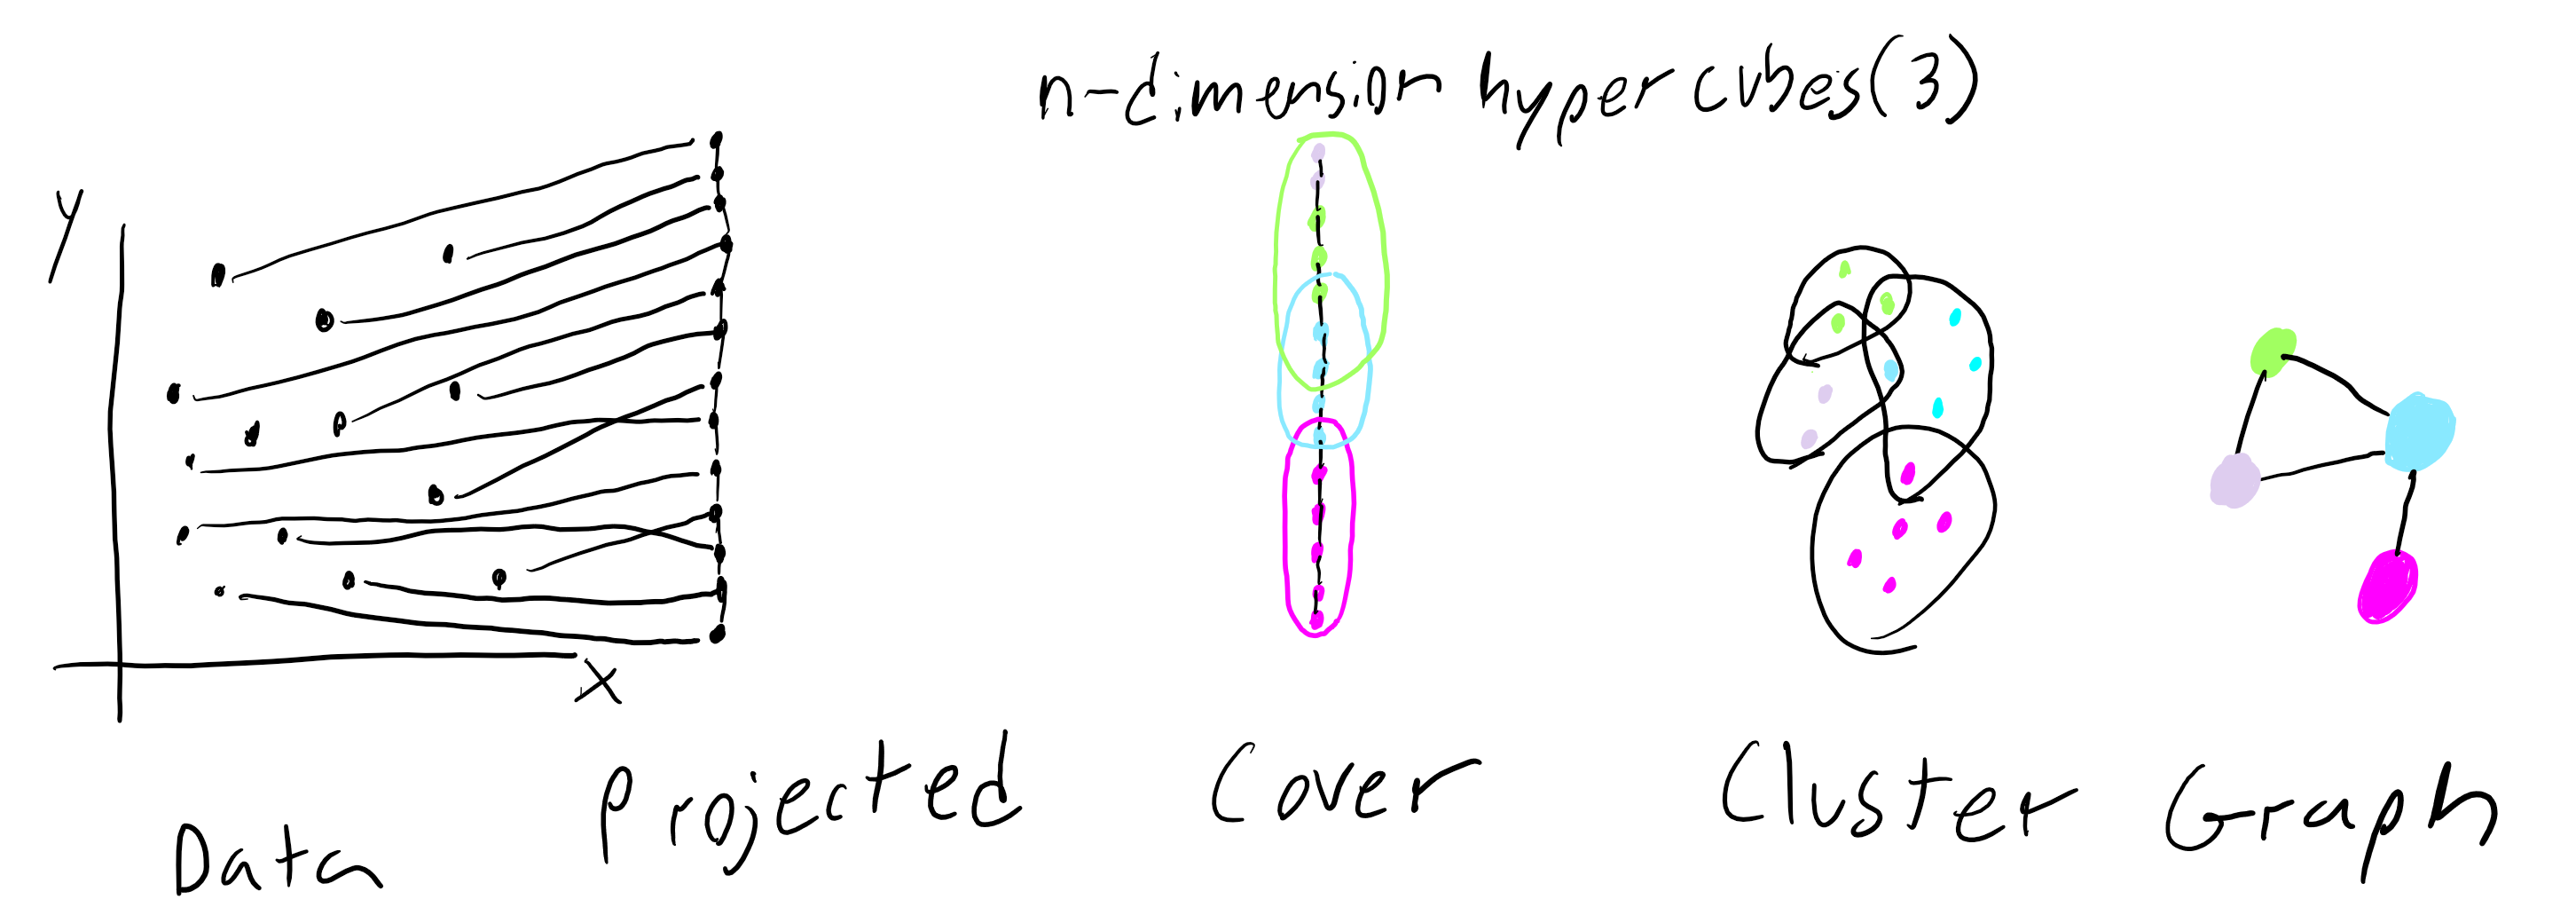

Mapper is a tool that can help connect data visually. It can be use to aid in data processes whether it is a data analysis, visual analysis, or help pick the best features for machine learning. As data scientists we look at numbers so much we forget that visuals can shed as much if not more light on our data.

# Imports

In [1]:
import pandas as pd
# matplotlib inline
import matplotlib
import sklearn
from kmapper import jupyter
import scipy

# Import the class
import kmapper as km
import numpy as np
from sklearn import ensemble

# Read and clean data

In [2]:
df = pd.read_csv('test.csv')
df

,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,...,18,2,2,10,19,19,19,7,2,18
1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,...,14,4,1,16,14,18,13,6,2,15
2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,...,18,2,1,12,14,17,16,6,4,20
3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,...,20,12,17,14,14,19,15,8,14,13
4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,...,17,3,1,14,14,16,18,10,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144745,Yuan Jinxing,ST (C),Unknown,Unknown,China,CHN,169,81,41,Right Only,...,7,3,3,2,3,9,8,8,1,11
144746,Aizudin Abdul Rahman,M (C),BSRC,Bruneian Premier League,Brunei (Premier League),BRU,180,69,24,Right Only,...,4,1,3,1,3,4,9,14,2,9
144747,Berlin Jean-Gilles,ST (C),CS Monteuil,PremiÃ¨re Ligue de soccer du QuÃ©bec,Canada (PLSQ),HAI,180,79,32,Right Only,...,8,3,1,1,2,4,10,6,3,11
144748,Frederik van Hauen,M (C),Skovshoved,2. Division,Denmark (2. Division),DEN,195,85,19,Right Only,...,3,3,3,3,4,4,3,16,1,5


Arbitrary top ten leagues based on internet lists

In [3]:
top_10_leagues = ['Spanish First Division', 'Italian Serie A', 'Ligue 1 Conforama', 'Bundesliga', 'English Premier Division',
              'Argentine Premier Di/vision', 'Brazilian National First Division', 'Eredivisie', 'Turkish Super League',
              'Portuguese Premier League']
df['top_league'] = np.where(df['Division'].isin(top_10_leagues), 1, 0)

In [4]:
df = pd.concat([df, pd.get_dummies(df['Best Pos'])], axis=1)
#Future add every position counted instead of just best postion
#Would need to parse through position to take out 14 positions
print(df['Best Pos'].unique())
#print(df['Position'].unique())

['AM (R)' 'ST (C)' 'GK' 'AM (L)' 'M (C)' 'D (C)' 'M (R)' 'DM' 'AM (C)'
 'M (L)' 'D (R)' 'D (L)' 'WB (R)' 'WB (L)']


# Visualization of Dependent Variables

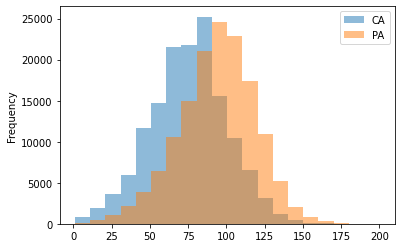

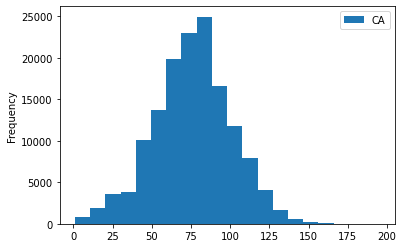

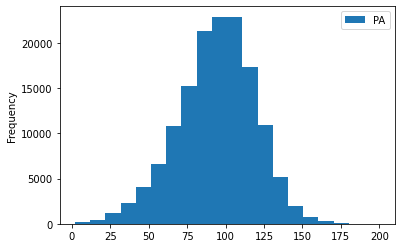

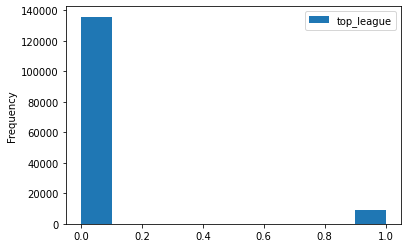

In [5]:
ax = df[['CA', 'PA']].plot.hist(bins=20, alpha=0.5)
ax = df[['CA']].plot.hist(bins=20)
ax = df[['PA']].plot.hist(bins=20)
ax = df[['top_league']].plot.hist()

# Histogram Observations

- Potential Ability on average is higher than Current Ability which makes sense because a players Potential Ability would be higher than their starting Current Ability.
- Next both Potential Ability and Current ability is close to a Normal distribution, however it is not quite as evenly distributed
- Whether or not a Player is in a top-ten league is a Binomial distribution of 1s and 0s with the vast majority of the players not in the top-ten leagues

# Get just Relavent Data

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
#print(df.dtypes)
newdf = df.select_dtypes(include=numerics).copy()
newdf.drop(['Height', 'Weight', 'Age', 'Value', 'Wage'], axis=1, inplace=True)
'''
Height    int64
Weight    int64
Age       int64
Value     int64
Wage      int64
'''
newdf

,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,...,D (L),D (R),DM,GK,M (C),M (L),M (R),ST (C),WB (L),WB (R)
0,195,200,7,20,2,20,14,7,9,13,...,0,0,0,0,0,0,0,0,0,0
1,195,196,10,14,2,17,10,8,16,15,...,0,0,0,0,0,0,0,1,0,0
2,181,196,10,13,1,17,10,2,11,14,...,0,0,0,0,0,0,0,1,0,0
3,176,193,14,12,19,12,18,3,16,10,...,0,0,0,1,0,0,0,0,0,0
4,186,190,10,16,1,20,8,1,10,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144745,3,3,3,1,4,6,2,1,1,6,...,0,0,0,0,0,0,0,1,0,0
144746,2,2,9,4,3,5,5,4,3,5,...,0,0,0,0,1,0,0,0,0,0
144747,2,2,2,1,3,1,1,1,2,7,...,0,0,0,0,0,0,0,1,0,0
144748,1,2,8,7,2,8,6,4,6,4,...,0,0,0,0,1,0,0,0,0,0


In [7]:
newdf.columns

Index(['CA', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str', 'Sta',
       'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB', 'Nat',
       'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla',
       'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp',
       'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc',
       'top_league', 'AM (C)', 'AM (L)', 'AM (R)', 'D (C)', 'D (L)', 'D (R)',
       'DM', 'GK', 'M (C)', 'M (L)', 'M (R)', 'ST (C)', 'WB (L)', 'WB (R)'],
      dtype='object')

# Create Sample Data Set to Analyze

## Pandas Sample (Randomized Sample)

In [8]:
sample_df = newdf.sample(72375, random_state=5)
ind_df = sample_df.drop(columns=['CA', 'PA', 'top_league'])
data = ind_df.to_numpy()
data

array([[12, 13,  1, ...,  0,  0,  0],
       [ 6,  1,  2, ...,  0,  0,  0],
       [12,  7,  4, ...,  0,  0,  0],
       ...,
       [ 8,  5,  3, ...,  0,  0,  0],
       [12,  9,  2, ...,  0,  0,  0],
       [11, 13,  3, ...,  0,  0,  0]], dtype=int64)

## Special Stratified Sample

Stratification sample gives a more accurate picture of the population in the sample rather than the randomized sample. The stratification keeps the integraty of random data while keeping the same distribution of the population.

In [9]:
def stratified_sample_df(df, col, n_samples_frac):
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(frac=n_samples_frac, random_state=5))

In [10]:
strat_sample_df = stratified_sample_df(newdf, 'CA', 0.5)
strat_ind_df = strat_sample_df.drop(columns=['CA', 'PA', 'top_league'])
strat_data = strat_ind_df.to_numpy()
print(len(strat_sample_df))
print(len(newdf))

72375
144750


## Sample comparison with original distribution 

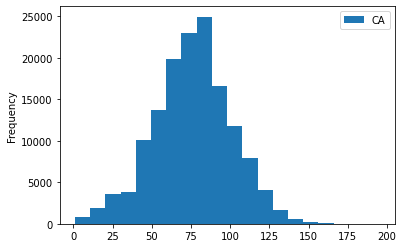

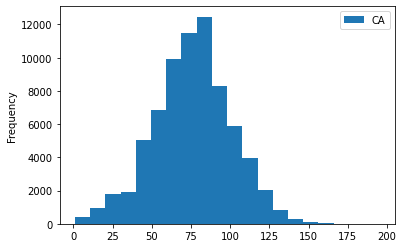

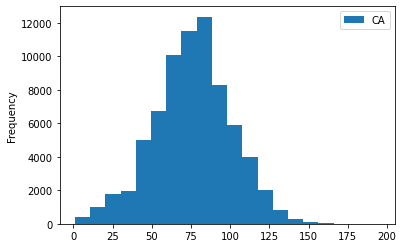

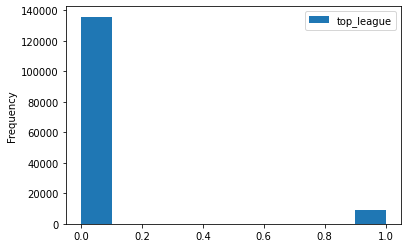

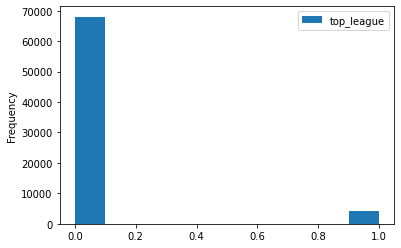

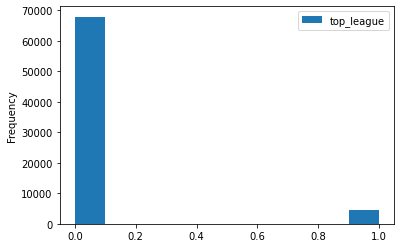

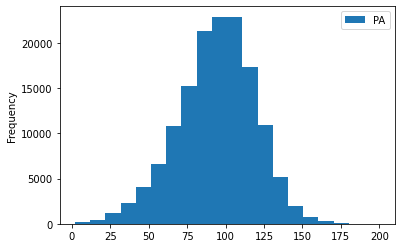

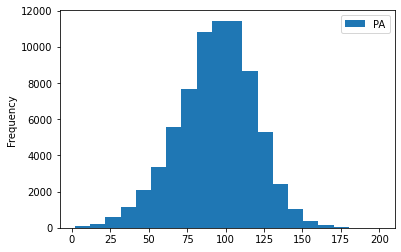

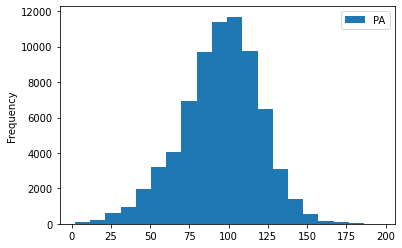

In [11]:
ax = newdf[['CA']].plot.hist(bins=20)
ax = strat_sample_df[['CA']].plot.hist(bins=20)
ax = sample_df[['CA']].plot.hist(bins=20)
ax = newdf[['top_league']].plot.hist()
ax = strat_sample_df[['top_league']].plot.hist()
ax = sample_df[['top_league']].plot.hist()
ax = newdf[['PA']].plot.hist(bins=20)
ax = strat_sample_df[['PA']].plot.hist(bins=20)
ax = sample_df[['PA']].plot.hist(bins=20)

We can see from the comparisons are all similar with exception of the Pandas sample for Potential Ability which has a different distribution for this reason we will go with the Stratified Sample for the Mapper

# Set Up Data for KMapper

In [12]:
attribute_list = [strat_sample_df[str(attr)].to_list() for attr in list(strat_sample_df.columns)]
attribute_list_np = [strat_sample_df[str(attr)].to_numpy() for attr in list(strat_sample_df.columns)]
attribute_list_np = strat_sample_df.to_numpy()

In [13]:
pred_df = strat_sample_df[['CA', 'PA', 'top_league']]
pred_data = np.array(pred_df['CA'])
pred_data

array([  1,   1,   1, ..., 179, 180, 195], dtype=int64)

# Create Mapper

In [34]:
# Initialize
#Show 40, .65, 15
#show 40, .7, 25
#show 47, .8, 20
#show 47, .8, 25
#show 10, .4, 15, [0,1]
#show 10, .4, 20, [0,1]

#.75, 25 -Future compare to .8
#.75, 30 --Gk doesn't make sense

#using #.8 25 ----
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(strat_data, projection=[0]) # X-Y axis

# Create a cover with 10 elements
cover = km.Cover(n_cubes=61, perc_overlap=0.8, limits=None, verbose=0)

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, strat_data, 
                   clusterer=sklearn.cluster.DBSCAN(algorithm='auto', eps=25, leaf_size=30, 
                                                    metric='euclidean', metric_params=None, min_samples=3, 
                                                    n_jobs=None, p=None), 
                   cover=cover, nerve=km.GraphNerve(min_intersection=1), precomputed=False, remove_duplicate_nodes=False)
#Test

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (72375, 61)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (72375, 61) using lens shaped (72375, 1)

Creating 61 hypercubes.

Created 189 edges and 68 nodes in 0:00:41.813913.


# Visualize Mapper

In [36]:
mapper.visualize(graph, path_html="Football_atributes_mapper.html",
                 title="classifiers",
                 custom_tooltips=pred_data,
                 color_values=attribute_list_np,
                 color_function_name=list(sample_df.columns)
                )
jupyter.display(path_html="Football_atributes_mapper.html")

Wrote visualization to: Football_atributes_mapper.html


C:\Users\jacks\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Observations

We observe a horshoe like simplex with an strut out of the side. Looking at the Current Ability (CA) and Potential Ability (PA) nodes on average gets larger. This gives the simplex a distiguished visual where we can see a distinct difference between one side to the other. This allows us to look into each attribute and see if they correlate whether positivly or negativly with CA and PA. While looking at the different attributes we see that the adnormal shape sticking out are some of the better goalkeepers. While investigating different Mapper Visualizes I found that goalkeepers and their attributes are so different sometimes they become their own simplexes all together. This could indicate that it might be benificail to remove goalkeepers from the Machine Learning modeling altogether or create a seperate model for just them. For the purpose of this project we still conserder goalkeepers.

### Positive Correlating Attributes
- Wor
- Vis
- Tec
- Tea
- Tck
- Str
- Sta
- Pos
- Pen
- Pas
- OtB
- Mar
- L Th
- Lon
- Hea
- Fla
- Flr
- Fin
- Dri
- Det
- Cro
- Cnt
- Cmp
- Bra
- Bal
- Ant
- Agg

### Negative Correlating Attributes
None

### Nuetral Correlating Attributes
- Pac
- Nat
- Jum
- Dec
- Acc
- Cor

### Goalkeeper Positive Correlating Attributes
- Thr
- Tro
- Ref
- Pun
- 1v1
- Kic
- Han
- Ecc
- Com
- Cmd
- Aer

### Goalkeeper Negative Correlating Attributes
None

### Goalkeeper Nuetral Correlating Attributes
None

From here, my suggestions would be to remove the following: 
- Pac
- Nat
- Jum
- Dec
- Acc
- Cor

from or analysis because they give no indication of helping to predict the better players. The next step would be to remove both goalkeepers from the data set, and the attributes considered goalkeeper attributes from the analysis. Once those two steps are done, the analysis should be repeated to see if any more features portray neutrality after the changes are made. Then we can use the remaining features for machine learning models with the confidence that there will be less garbage data.

# Criticism

Different positions have different attributes that contribute to how good the playing is. For example, a defender should be better at tackling than a Striker, while a striker will be better at finishing. For this reason, our Mapper cannot cluster this observation together. If we can get the Mapper to consider positions, our observations would be of higher quality, and we can pass that information along to our machine learning models.

# Improvements

One improvement I want to make is to consider every position a player can play rather than just their best position. Another potential improvement was already mentioned to remove goalkeepers from the analysis since their position is so different that it deserves its own analysis and machine learning models. Since we could achieve multiple differently shaped Mapper images, we could compare the results of the images and see if we get different results of which features are useful and which are not.